In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from google.colab import drive
drive.mount('/content/drive')

# Reading dataset
df = pd.read_csv("/content/data.csv")
print("\nDataSet Categorization")
print("------------------------\n")
df.info()
print("\nFirst 5 rows\n------------")
print(df.head())

# Handling missing values (choose ONE approach: fill or drop)
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values instead of dropping
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())


print("\nMissing values after handling:")
print(df.isnull().sum())

# Sorting by Age
df = df.sort_values(by='Age')
print("\nSorted Data by age:")
print(df.head())

# Encoding categorical columns
le = LabelEncoder()
le_pers=LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Interest'] = le.fit_transform(df['Interest'])
df['Personality'] = le_pers.fit_transform(df['Personality'])

# Scaling numerical columns
numerical_cols = ["Age", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after preprocessing:\n")
print(df.head())

# Save preprocessed data if needed
df.to_csv("preprocessed.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DataSet Categorization
------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB

First 5 rows
------------
    Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0  2

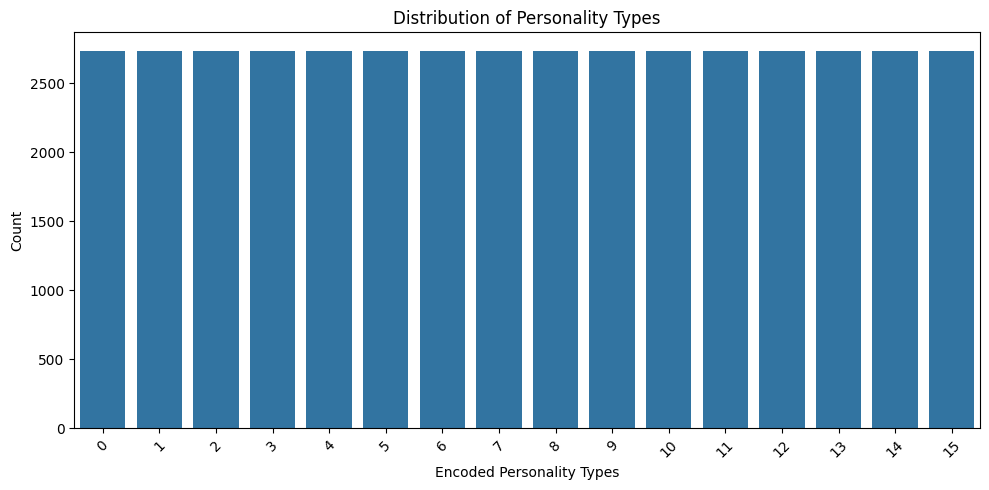

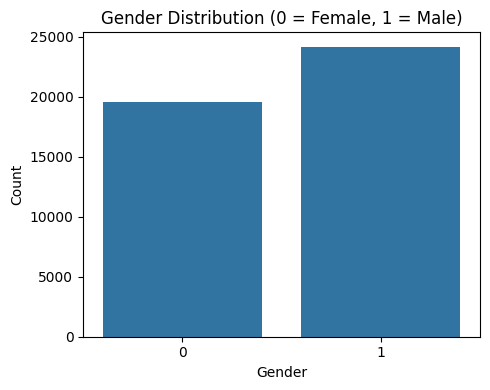

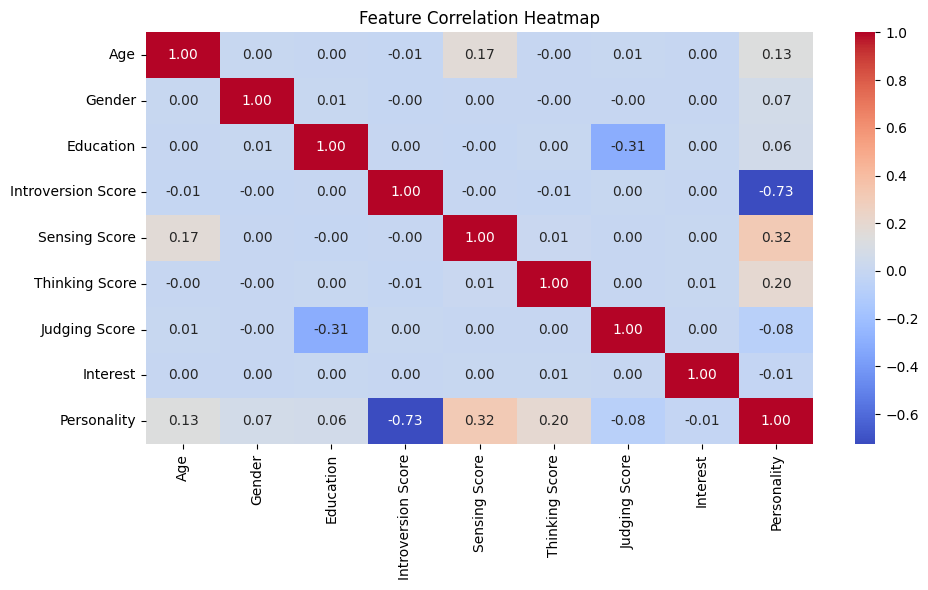

In [ ]:
# === 1. Distribution of Personality Types ===
plt.figure(figsize=(10, 5))
sns.countplot(x="Personality", data=df)
plt.title("Distribution of Personality Types")
plt.xlabel("Encoded Personality Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

# === 2. Gender Distribution ===
plt.figure(figsize=(5, 4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("\n")

# === 3. Heatmap of Feature Correlations ===
df_pers=df.copy()
df_pers["Personality"] = le.fit_transform(df_pers["Personality"])
plt.figure(figsize=(10, 6))
sns.heatmap(df_pers.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
print("\n")

Accuracy: 0.7843753571836781
Logistic Regression Accuracy: 78.44%

CONFUSION MATRIX
 [[828  62  14   4  88   3   1   0  70   5   1   0   9   0   0   0]
 [ 79 816   0  26   9  77   0   4   9  50   0   2   0   7   0   1]
 [ 22   0 803  60   4   0  95   2   2   0  60   7   0   0   6   1]
 [  5  15  70 791   1   2   5  82   0   2   5  70   0   0   0   8]
 [ 28   1   0   0 878  57  19   5   1   0   0   0  82   3   0   0]
 [  1  27   0   0  88 859   2  14   0   3   0   0   6  81   0   0]
 [  1   0  35   4  18   0 878  54   0   0   4   0   0   0  73   7]
 [  0   1   5  40   4  14  78 906   0   0   0   4   0   2  13  62]
 [ 49   5   1   1  11   0   0   0 837  63  25   3  97   8   2   0]
 [  1  62   0   2   0   2   0   1  82 849   1  17   9 103   0   4]
 [  2   0  52   2   0   0   9   0  20   0 857  62   4   0  84   9]
 [  1   1   7  52   0   0   1  10   0  17  68 845   1   1   9  96]
 [  3   0   1   0  61   5   7   0  28   1   1   1 895  78   8   5]
 [  2   2   0   0   9  75   0   1   5  29   

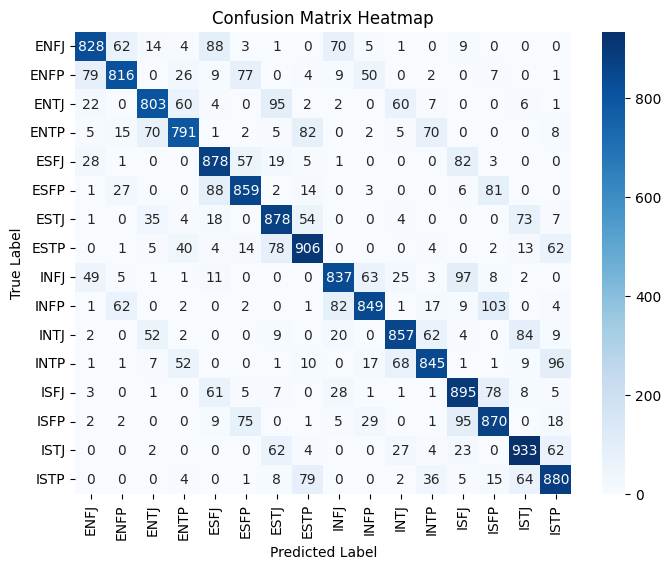

Y prediction: [6]
Actual Y: 11


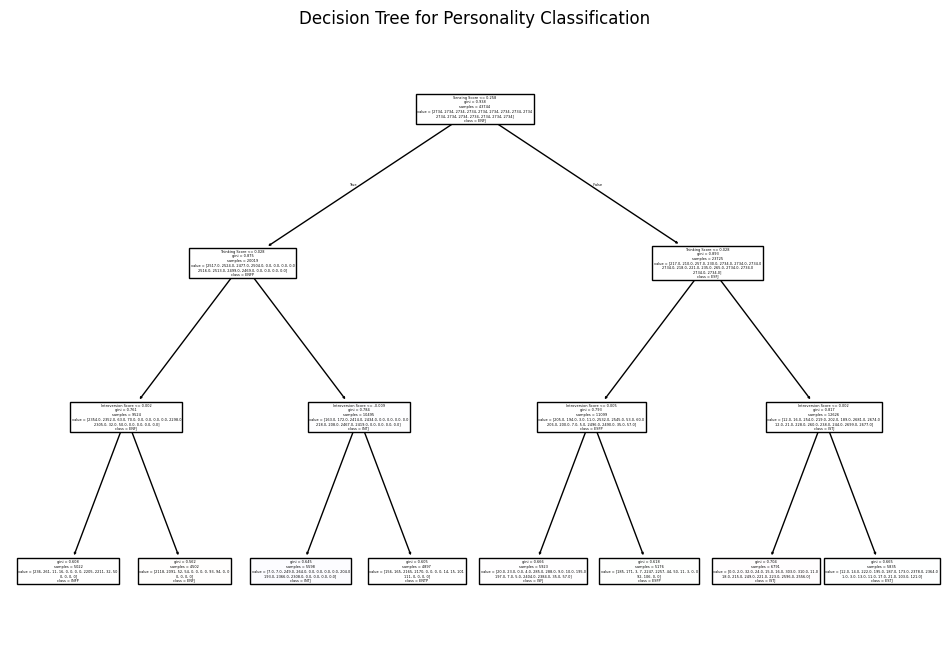

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree

X = df.drop(columns=['Personality'])
y = df['Personality']
features = X.columns

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=44)
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

model = LogisticRegression(max_iter=1000)
model.fit(xtrain_scaled, ytrain)

y_pred = model.predict(xtest_scaled)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:",accuracy)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(ytest, y_pred)
print("\nCONFUSION MATRIX\n", conf_matrix)


plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=le_pers.classes_,yticklabels=le_pers.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

new_data = pd.DataFrame({
    "Age": [20.0],
    "Gender": [0],     # or 0 if encoded
    "Education": [0],
    "Introversion Score": [5.56984],
    "Sensing Score": [3.47304],
    "Thinking Score": [4.67502],
    "Judging Score": [7.28055],
    "Interest": [0]      # or 0 if encoded
})

new_data_scaled = scaler.transform(new_data)

xt = model.predict(new_data_scaled)
print("Y prediction:", xt)
print("Actual Y:", y.iloc[3821])

dtree = DecisionTreeClassifier(max_depth=3,random_state=4)
dtree=dtree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(dtree,
          feature_names=features,
          class_names=le_pers.classes_,
          filled=True)
plt.title("Decision Tree for Personality Classification")
plt.show()